## Raven Memory benchmarking

The following is meant to observe the memory performance in a more verbose logging mode, for the baseline raven models

## Setup

In [ ]:
# Due to the size of the CSV data, we did not include it in the repository. You can download our current CSV data from hugging face
!mkdir -p ./logs
!cd ./logs && wget https://huggingface.co/picocreator/memory-size-experiment-for-rwkv/raw/main/memory-benchmark-logs/Raven-1B5-v12.csv
!cd ./logs && wget https://huggingface.co/picocreator/memory-size-experiment-for-rwkv/raw/main/memory-benchmark-logs/Raven-3B-v12.csv

In [ ]:
# Install required pip libraries
!python -m pip install matplotlib

## Loading of CSV data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50)

# Load the CSV data
csv_1b5 = pd.read_csv("./logs/Raven-1B5-v12.csv")
csv_3b  = pd.read_csv("./logs/Raven-3B-v12.csv")

In [56]:
# Define a custom function to calculate averages for the first N elements
def calculate_first_n_avg(n, s):
    return s.iloc[:n].mean()

# Groupby the 'eval_token_count' and calculate the average for the first 5, 10, and 20 'eval_token_pos'
def group_csv_data(inCSV, modelName):
    grouped_data = inCSV.groupby(['eval_token_count', 'is_random_baseline']).apply(lambda x: pd.Series({
        'First 1 tokens average': calculate_first_n_avg(1, x['eval_token_pos']),
        'First 2 tokens average': calculate_first_n_avg(2, x['eval_token_pos']),
        'First 5 tokens average': calculate_first_n_avg(5, x['eval_token_pos']),
        'First 10 tokens average': calculate_first_n_avg(10, x['eval_token_pos']),
        'First 25 tokens average': calculate_first_n_avg(25, x['eval_token_pos']),
        'First 50 tokens average': calculate_first_n_avg(50, x['eval_token_pos']),
        'First 100 tokens average': calculate_first_n_avg(100, x['eval_token_pos']),
        'First 250 tokens average': calculate_first_n_avg(250, x['eval_token_pos']),
        'First 500 tokens average': calculate_first_n_avg(500, x['eval_token_pos']),
        'First 750 tokens average': calculate_first_n_avg(750, x['eval_token_pos']),
        'First 1000 tokens average': calculate_first_n_avg(1000, x['eval_token_pos'])
    })).reset_index()
    grouped_data['model'] = modelName
    return grouped_data

# Grouped CSV data
grouped_csv_1b5 = group_csv_data(csv_1b5, 'Raven 1B5')
grouped_csv_3B  = group_csv_data(csv_3b, 'Raven 3B')

# Merge the DataFrames 
full_grouped_data = pd.concat([grouped_csv_1b5, grouped_csv_3B])

# Plot the data
full_grouped_data

,eval_token_count,is_random_baseline,First 1 tokens average,First 2 tokens average,First 5 tokens average,First 10 tokens average,First 25 tokens average,First 50 tokens average,First 100 tokens average,First 250 tokens average,First 500 tokens average,First 750 tokens average,First 1000 tokens average,model
0,5,False,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Raven 1B5
1,10,False,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Raven 1B5
2,15,False,0.0,0.0,0.0,0.0,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,0.133333,Raven 1B5
3,20,False,0.0,0.0,0.0,0.0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,Raven 1B5
4,25,False,0.0,0.0,0.0,0.0,0.120000,0.120000,0.120000,0.120000,0.120000,0.120000,0.120000,Raven 1B5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,800,False,0.0,0.0,36.8,103.8,152.120000,260.980000,256.230000,413.152000,576.928000,843.841333,892.006250,Raven 3B
63,850,False,0.0,0.0,35.2,105.1,155.840000,251.840000,257.280000,426.480000,587.070000,854.548000,924.349412,Raven 3B
64,900,False,0.0,0.0,38.6,101.4,148.160000,249.160000,254.250000,430.404000,594.196000,860.364000,992.126667,Raven 3B
65,950,False,0.0,0.0,36.2,110.9,155.120000,285.720000,269.370000,445.048000,608.114000,870.717333,1017.342105,Raven 3B


In [90]:
# We get the position values, of the average token prediction, withou ONLY the output.
# this helps get the approximate "random" score baseline, while accounting for the fact that the model may eventually notice patterns that makes it not truely random
# (eg. no special characters, etc), as the sample grows.

# Filter out for noise baseline
random_baseline = full_grouped_data[full_grouped_data['is_random_baseline'] == True]

# Geet the average first 1000 tokens for all models
random_baseline_pos = random_baseline.groupby(['model']).mean()['First 1000 tokens average']["Raven 1B5"]
half_random_base_line_pos = random_baseline_pos / 2

print("random_baseline_pos", random_baseline_pos)
print("half_random_base_line_pos", half_random_base_line_pos)

# Give the randomized baseline values
random_baseline

random_baseline_pos 1665.979
half_random_base_line_pos 832.9895


,eval_token_count,is_random_baseline,First 1 tokens average,First 2 tokens average,First 5 tokens average,First 10 tokens average,First 25 tokens average,First 50 tokens average,First 100 tokens average,First 250 tokens average,First 500 tokens average,First 750 tokens average,First 1000 tokens average,model
66,1000,True,1188.0,597.0,5775.4,3777.9,2974.16,2219.60,1830.49,1808.140,1705.120,1693.132,1665.979,Raven 1B5
66,1000,True,1813.0,910.5,4843.8,3640.0,2973.68,2270.46,1834.36,1873.672,1759.384,1718.648,1661.297,Raven 3B


## Plotting of data

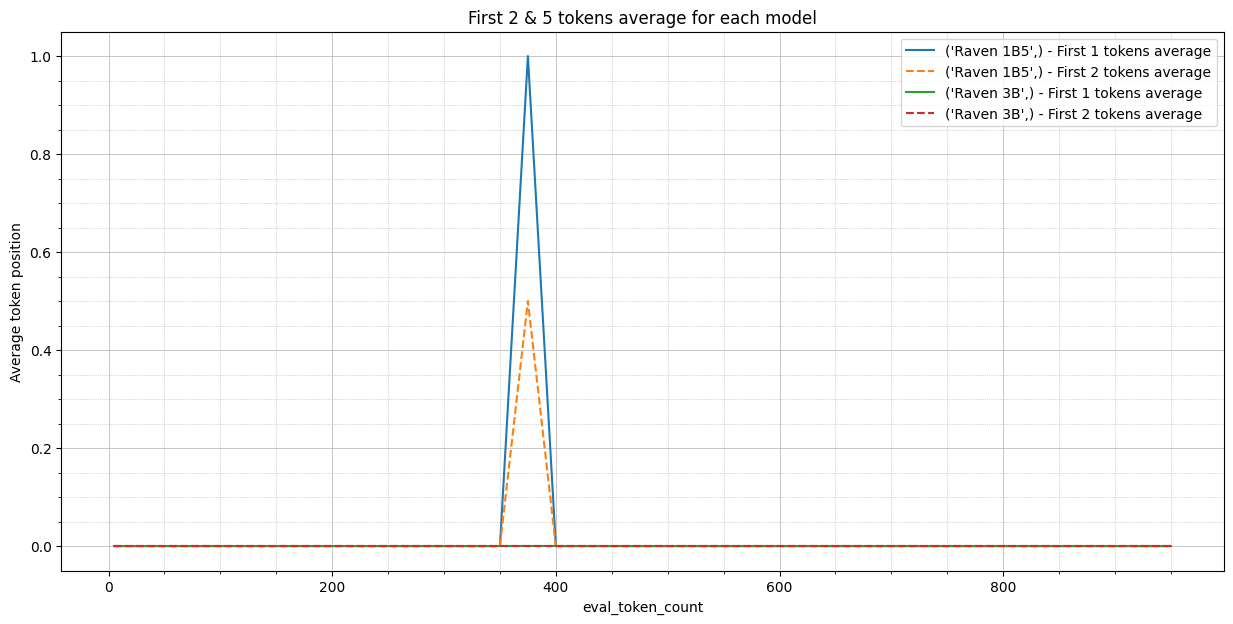

In [69]:
# Lets chart the first 2 & 5 tokens average for each model
fig, ax = plt.subplots(figsize=(15,7)) #
ax.set_title('First 2 & 5 tokens average for each model')
ax.set_xlabel('Token count')
ax.set_ylabel('Average token position')

# Plot the data, excluding is random baseline = true
for key, grp in full_grouped_data[full_grouped_data['is_random_baseline'] == False].groupby(['model']):
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 1 tokens average', label=f'{key} - First 1 tokens average')
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 2 tokens average', label=f'{key} - First 2 tokens average', linestyle='dashed')
    # ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 5 tokens average', label=f'{key} - First 5 tokens average')

# Include grid lines - with major, and minor grid
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle=':', linewidth='0.5')

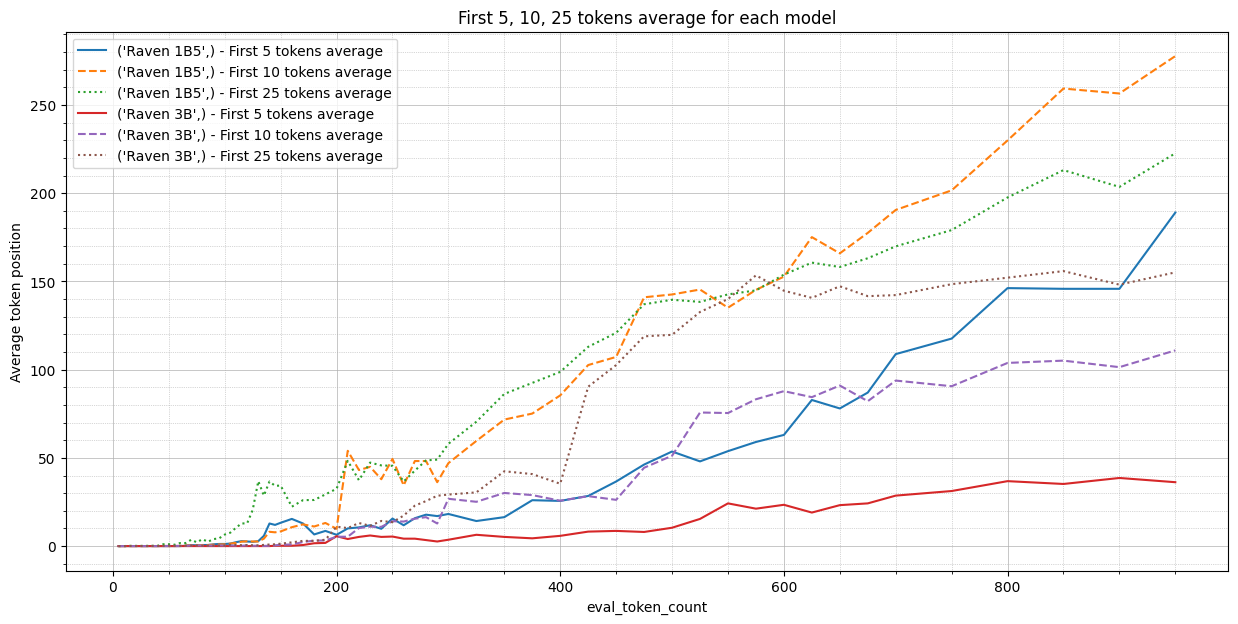

In [70]:
# Lets chart the first 5,10,25 tokens average for each model
fig, ax = plt.subplots(figsize=(15,7)) #
ax.set_title('First 5, 10, 25 tokens average for each model')
ax.set_xlabel('Token count')
ax.set_ylabel('Average token position')

# Plot the data, excluding is random baseline = true
for key, grp in full_grouped_data[full_grouped_data['is_random_baseline'] == False].groupby(['model']):
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 5 tokens average', label=f'{key} - First 5 tokens average')
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 10 tokens average', label=f'{key} - First 10 tokens average', linestyle='dashed')
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 25 tokens average', label=f'{key} - First 25 tokens average', linestyle='dotted')

# Include grid lines - with major, and minor grid
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle=':', linewidth='0.5')

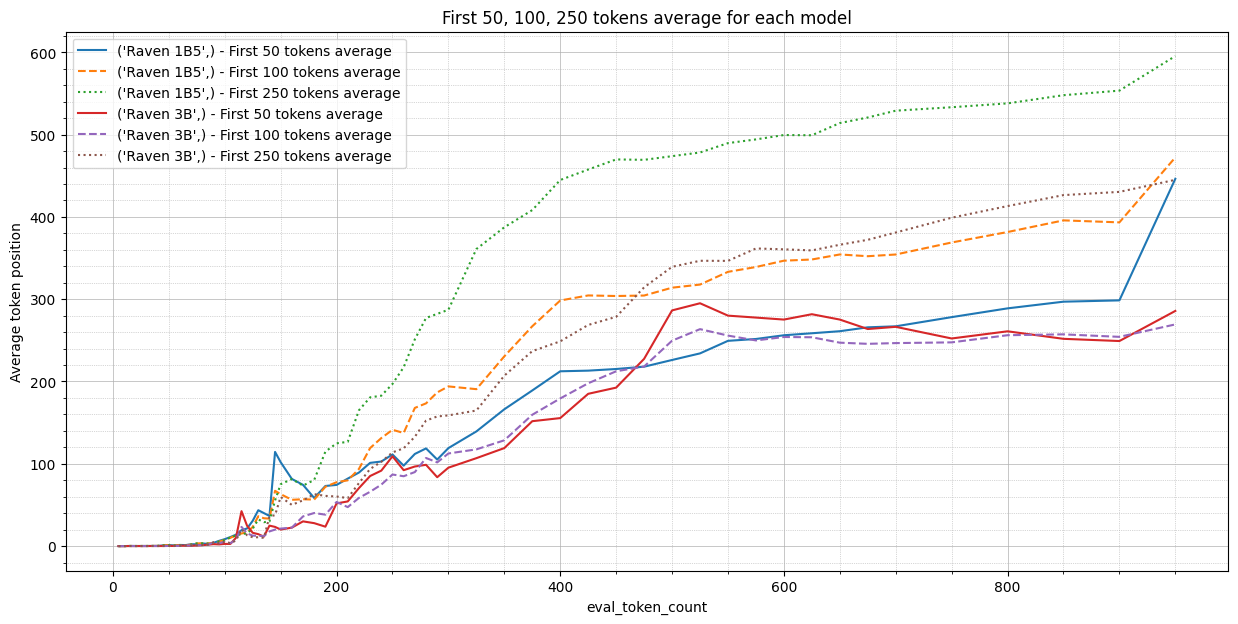

In [71]:
# Lets chart the first 50,100,250 tokens average for each model
fig, ax = plt.subplots(figsize=(15,7)) #
ax.set_title('First 50, 100, 250 tokens average for each model')
ax.set_xlabel('Token count')
ax.set_ylabel('Average token position')

# Plot the data, excluding is random baseline = true
for key, grp in full_grouped_data[full_grouped_data['is_random_baseline'] == False].groupby(['model']):
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 50 tokens average', label=f'{key} - First 50 tokens average')
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 100 tokens average', label=f'{key} - First 100 tokens average', linestyle='dashed')
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 250 tokens average', label=f'{key} - First 250 tokens average', linestyle='dotted')

# Include grid lines - with major, and minor grid
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle=':', linewidth='0.5')

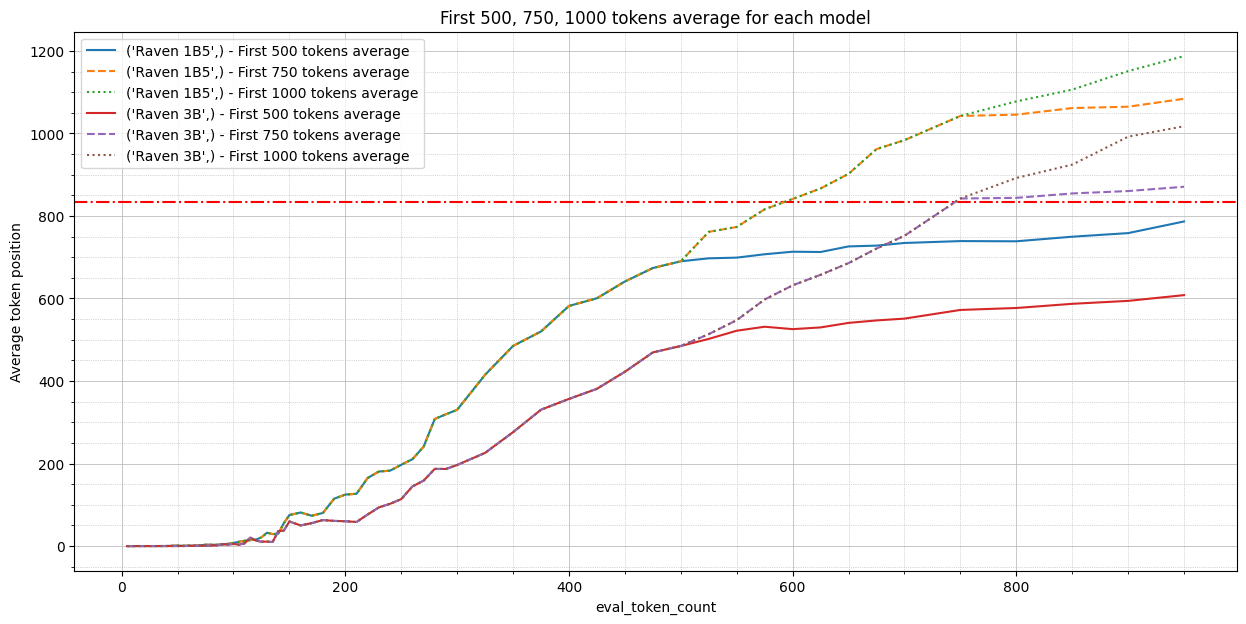

In [94]:
# Lets chart the first 50,100,250 tokens average for each model
fig, ax = plt.subplots(figsize=(15,7)) #
ax.set_title('First 500, 750, 1000 tokens average for each model')
ax.set_xlabel('Token count')
ax.set_ylabel('Average token position')

ax.axhline(y=half_random_base_line_pos, color='r', linestyle='-.', label='50 percent of Randomized baseline')

# Plot the data, excluding is random baseline = true
for key, grp in full_grouped_data[full_grouped_data['is_random_baseline'] == False].groupby(['model']):
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 500 tokens average', label=f'{key} - First 500 tokens average')
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 750 tokens average', label=f'{key} - First 750 tokens average', linestyle='dashed')
    ax = grp.plot(ax=ax, kind='line', x='eval_token_count', y='First 1000 tokens average', label=f'{key} - First 1000 tokens average', linestyle='dotted')

# Include grid lines - with major, and minor grid
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5')
ax.grid(which='minor', linestyle=':', linewidth='0.5')
